# Edit dataset

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.datasets import Planetoid
from torch_geometric.datasets import AMiner
import random
import torch

dataset=Planetoid(root=r"./Cora777777777",name="Cora")

Cora is a homogeneous graph, with only one type of node ( paper ) and one type of edge

In [3]:
print(" The number of classes contained in the network data :",dataset.num_classes)
print(" Number of characteristics of network data edge :",dataset.num_edge_features)
print(" Number of network data sides :",dataset.data.edge_index.shape[1]/2) #  Divide 2 yes OOC The organizational form of 
print(" Characteristic number of network data nodes :",dataset.num_node_features)
print(" Number of network data nodes :",dataset.data.x.shape[0])


 The number of classes contained in the network data : 7
 Number of characteristics of network data edge : 0
 Number of network data sides : 5278.0
 Characteristic number of network data nodes : 1433
 Number of network data nodes : 2708


## Create numpy arrays from Data (dataset.data)

In [4]:
# # Graph connectivity in COO format with shape [2, num_edges]
# edge_index = dataset.data.edge_index;

# # Edge feature matrix with shape [num_edges, num_edge_features]
# edge_attr = dataset.data.edge_attr; #None

# # Node feature matrix with shape [num_nodes, num_node_features]
# x = dataset.data.x

# # Graph-level or node-level ground-truth labels with arbitrary shape.
# y = dataset.data.y

# # Node position matrix with shape [num_nodes, num_dimensions]
# pos = dataset.data.pos #None

# # Rest
# batch = dataset.data.batch #None
# keys = dataset.data.keys
# edge_weight = dataset.data.edge_weight #None
# node_stores = dataset.data.node_stores #?
# edge_stores = dataset.data.edge_stores #?

In [5]:
#Test edge index
ml = np.array([9,9,9,8,8,8,8,8,7,7,7,6,6,6,5,5,5,4,4,4,4,4,4,4,3,3,3,2,2,1,0,0,0])
mr = np.sort(ml)
edges_test = np.stack([mr, ml])
edges_test = torch.tensor(edges_test)

# Edit arrays and save them to a new Data object

classData(x: Optional[Tensor] = None, edge_index: Optional[Tensor] = None, edge_attr: Optional[Tensor] = None, y: Optional[Tensor] = None, pos: Optional[Tensor] = None, **kwargs)

**Delete the edges of most connected node**

In [6]:
def deleteMostConnectedEdge(edge_index):
    """
    Remove the edges of most connected node

    :input: edge index, dtype=tensor
    :return: modified edge index, dtype=tensor
    """
    # Graph connectivity in COO format with shape [2, num_edges]
    edge_index = edge_index.cpu().detach().numpy();
   
    left = edge_index[0]
    right = edge_index[1]

    # Find the most connected
    count_edge_0 = np.bincount(edge_index[0])
    max_edge_0 = np.max(count_edge_0)

    # Get the index of elements; index == edge
    index_max_0 = np.where(count_edge_0 == max_edge_0)
    index_max_0 = index_max_0[0][0]

    # indxs to delete
    to_delete_left = np.where(left == index_max_0)

    #left
    new_edges_left = np.delete(left, to_delete_left)
    new_edges_right = np.delete(right, to_delete_left)
    
    #right
    to_delete_right = np.where(new_edges_right == index_max_0)
    new_edges_right = np.delete(new_edges_right, to_delete_right)
    new_edges_left = np.delete(new_edges_left, to_delete_right)
    print("Output:")
    print(new_edges_left)
    print(new_edges_right)
    return torch.tensor(np.stack([new_edges_left, new_edges_right]))
    
#edge_index_delete_most_connected = deleteMostConnectedEdge(dataset.data.edge_index)
edge_index_delete_most_connected = deleteMostConnectedEdge(dataset.data.edge_index)
edge_index_delete_most_connected    

Output:
[   0    0    0 ... 2707 2707 2707]
[ 633 1862 2582 ...  598 1473 2706]


tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])

**Delete random edge**

In [7]:
def deleteRandomEdge(edge_index, n):
    """
    Delete random edges.
    :input: edge_index, dtype=tensor
            n, number of edges, dtype=int
    :output: modified edge index, dtype=tensor
    """
    if n > len(edge_index[0]):
        print("The value of n is bigger than the number of edges")
        return

    # Graph connectivity in COO format with shape [2, num_edges]
    edge_index = edge_index.cpu().detach().numpy();
    left = edge_index[0]
    right = edge_index[1]
    count_edge_0 = np.bincount(edge_index[0])

    # Generate n random indexes
    randomlist = random.sample(range(0, len(left)), n)
        
    new_edges_left = np.delete(left, randomlist)
    new_edges_right = np.delete(right, randomlist)

    print("Output:")
    print(new_edges_left)
    print(new_edges_right)

    return torch.tensor(np.stack([new_edges_left, new_edges_right]))

edge_index_delete_random = deleteRandomEdge(dataset.data.edge_index, 1)
#edge_index_delete_random = deleteRandomEdge(edges_test, 30)

Output:
[   0    0    0 ... 2707 2707 2707]
[ 633 1862 2582 ...  598 1473 2706]


**Add random edge**

In [8]:
def addRandomEdge(edge_index, n):
    """
    Add random edges to existing nodes
    :input: edge_index, dtype=tensor
            n, number of edges, dtype=int
    :output: modified edge index, dtype=tensor

    """
    # Graph connectivity in COO format with shape [2, num_edges]
    edge_index = edge_index.cpu().detach().numpy()
    left = edge_index[0]
    right = edge_index[1]

    count_edge_0 = np.bincount(edge_index[0])
    print(len(count_edge_0))
    count_edge_1 = np.bincount(edge_index[1])

    # Generate n random edges
    randomlist1 = np.random.randint(0, len(count_edge_0), size=(n, ))
    print(randomlist1)
    for re in range(len(randomlist1)):
        left = np.append(left, randomlist1[re])

    randomlist2 = np.random.randint(0, len(count_edge_0), size=(n, ))
    for re in range(len(randomlist2)):
        right = np.append(right, randomlist2[re])

    return torch.tensor(np.stack([left, right]))

edge_index_add_random = addRandomEdge(dataset.data.edge_index, 60)
#edge_index_add_random = addRandomEdge(edges_test, 10)
edge_index_add_random


2708
[  18 1825 2653 1200 1426  552 1315 2318 1863 1540  746 1161 2401 1203
  501  646 2558  637  809 1847  999 2451   31  302 2511 2589 1077  473
 1963 1215  577 2392 1419 1970 1681 1638  758 2203 2013 1683 2378  140
   88  247 1186 2061  833 2275 1966 1614 1479  775 2006  279  269  248
 1198 1111 2097 1088]


tensor([[   0,    0,    0,  ..., 1111, 2097, 1088],
        [ 633, 1862, 2582,  ..., 1743, 1863,  406]])

**Delete certain edges, index list**

In [9]:
def deleteCertainEdgesPosition(edge_index, list_of_edge_idx):
    """
    Delete edges from list of indexes. Delete edges at certain position.
    :input: edge_index, dtype=tensor
            list_of_edge_idx, idxs of edges to delete, dtype=list
    :output: modified edge index, dtype=tensor

    """    
    # Graph connectivity in COO format with shape [2, num_edges]
    edge_index = edge_index.cpu().detach().numpy()
    left = edge_index[0]
    right = edge_index[1]
        
    new_edges_left = np.delete(left, list_of_edge_idx)
    new_edges_right = np.delete(right, list_of_edge_idx)
    return torch.tensor(np.stack([new_edges_left, new_edges_right]))

#edge_index_delete_certain_idx = deleteCertainEdgesPosition(edges_test, [0,1,2,3])

**Delete edges of certain nodes**

In [10]:
def deleteEdgesOfNodes(edge_index, node_list):
    """
    Delete edges of certain nodes
    :input: edge_index, dtype=tensor
            list_of_edge_idx, idxs of edges to delete, dtype=list
    :output: modified edge index, dtype=tensor

    """    
    # Graph connectivity in COO format with shape [2, num_edges]
    edge_index = edge_index.cpu().detach().numpy()
    left = edge_index[0]
    right = edge_index[1]

    for i in range(len(node_list)):    
        # indxs to delete
        to_delete_left = np.where(left == node_list[i])

        #left
        new_edges_left = np.delete(left, to_delete_left)
        new_edges_right = np.delete(right, to_delete_left)
        
        #right
        to_delete_right = np.where(new_edges_right == node_list[i])
        new_edges_right = np.delete(new_edges_right, to_delete_right)
        new_edges_left = np.delete(new_edges_left, to_delete_right)
        left = new_edges_left; right = new_edges_right

    print("Output:")
    print(new_edges_left)
    print(new_edges_right)
    return torch.tensor(np.stack([new_edges_left, new_edges_right]))

#edge_index_delete_for_nodes = deleteEdgesOfNodes(edges_test, [0,1,2,3])

**Create new Data object**

In [11]:
from torch_geometric.data import Data
dataset_new = Data(x=dataset.data.x, y=dataset.data.y, edge_index=edge_index_delete_most_connected)

In [12]:
dataset = Data(x=dataset.data.x, y=dataset.data.y, edge_index=dataset.data.edge_index)

## Plot the graph using networkx

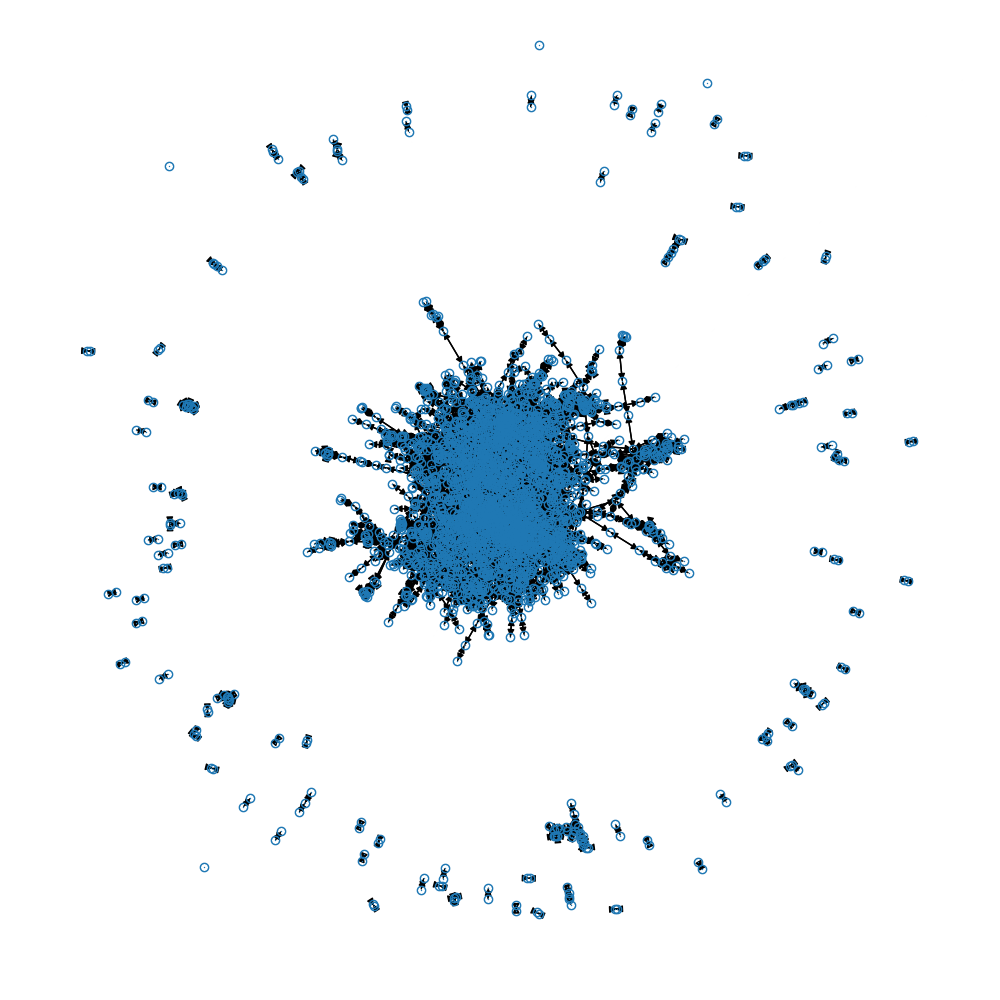

In [13]:
def plotGraph(data):
    """
    Plot the graph
    :input: data object
    :output: plot of the graph in a form of %widget
    """
    from torch_geometric.utils.convert import to_networkx
    data.to_dict()
    %matplotlib widget
    vis = to_networkx(data)
    plt.figure(1,figsize=(10,10)) 
    nx.draw(vis, cmap=plt.get_cmap('Set3'),node_size=1,linewidths=6)
    plt.show()
plotGraph(dataset_new)


**Check if the graph has self loops**

In [14]:
def getPairsNum(edge_index):
    '''
    Check if the graph has self loops. 
    
    :edge_index: edge indexes
    :return: the number of pairs
    '''
    pairs = 0;
    for i in range(len(edge_index[0])):
        if edge_index[0][i] == edge_index[1][i]:
            pairs += 1
            print(i)
    
    return pairs

pairs = getPairsNum(edge_index_delete_random)

# Nodes

In [15]:
# Node feature matrix with shape [num_nodes, num_node_features] 2700 nodes, 1433 features
x = dataset.x

# Graph-level or node-level ground-truth labels with arbitrary shape.
y = dataset.y

**Delete a certain node**

Output:
[1354 1355 1356 ... 2706 2707 2707]
[2270 1957 1613 ... 2707 1473 2706]


C:\Users\kateb\AppData\Local\Temp/ipykernel_14080/630502329.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index_new = torch.tensor(edge_index_new)


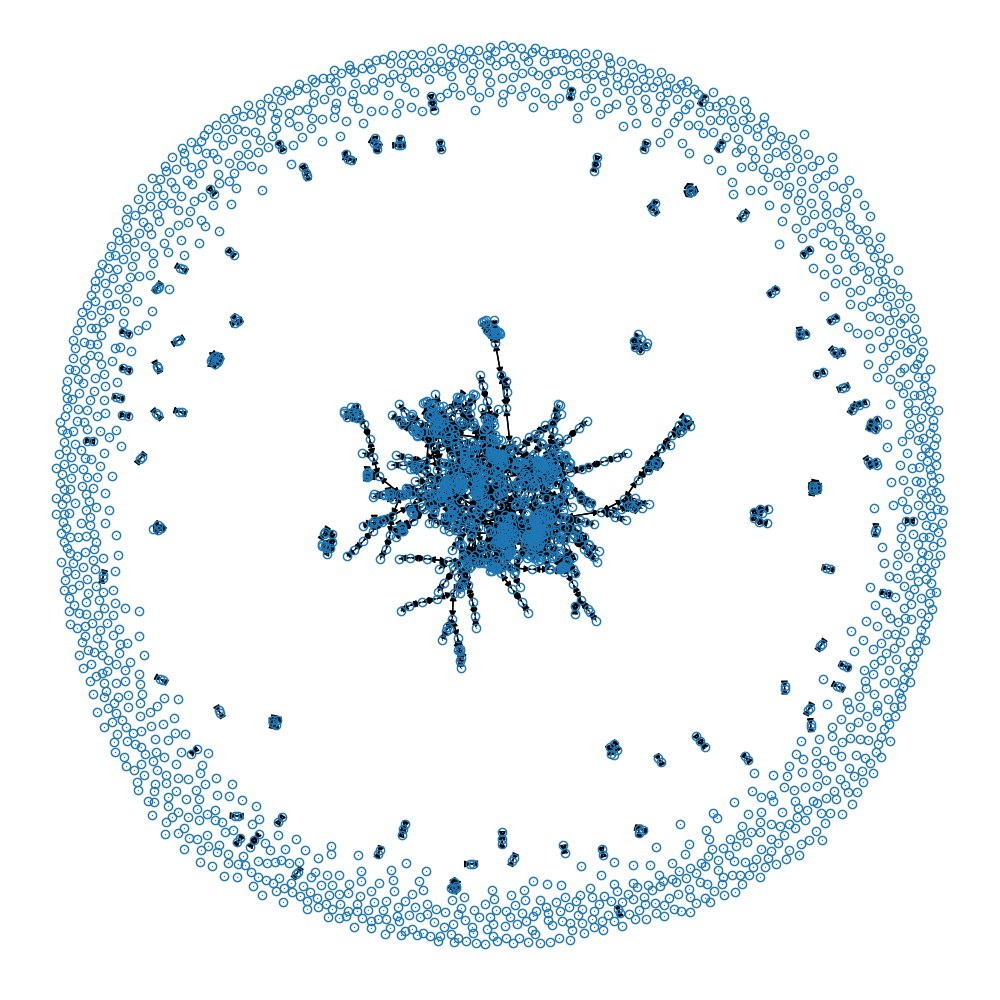

In [16]:
def deleteCertainNodes(x, edge_index, list_of_nodes):
    """
    Delete nodes and edges from a list of nodes

    ::input:: x, dtype=tensor
            edge_index, edge index, dtype=tensor
            list_of_nodes, list of nodes to delete, dtype=list
    ::output:: modified x, modified edge_index, dtype=tensor
    """
    # X
    x = x.cpu().detach().numpy()
    x_new = np.delete(x, list_of_nodes, 0)
    x_new = torch.tensor(x_new)

    # Edge index
    edge_index_new = deleteEdgesOfNodes(edge_index, list_of_nodes)
    edge_index_new = torch.tensor(edge_index_new)

    return x_new, edge_index_new

    
list1 = [i for i in range(1354)]
x_new, edge_index_delete_certain_nodes = deleteCertainNodes(x, dataset.edge_index, list1)
dataset_new = Data(x=x_new, y=dataset.y, edge_index=edge_index_delete_certain_nodes)
plotGraph(dataset_new)


**Delete random node**

In [17]:
def deleteRandomNodes(x, edge_index, n):
    """
    Delete random nodes and edges from a list of nodes and edges

    ::input:: x, dtype=tensor
            edge_index, edge index, dtype=tensor
            n, number of nodes to delete, dtype=list
    ::output:: modified x, modified edge_index, dtype=tensor
    """
    # X
    x = x.cpu().detach().numpy()
    # Generate n random indexes
    randomlist = random.sample(range(0, len(x)), n)
    x_new = np.delete(x, randomlist, 0)
    x_new = torch.tensor(x_new)

    # Edge index
    edge_index_new = deleteEdgesOfNodes(edge_index, randomlist)
    edge_index_new = torch.tensor(edge_index_new)

    return x_new, edge_index_new

# x_delete_random , edge_index_delete_random = deleteRandomNodes(x, dataset.edge_index, 6)

**Add nodes**

In [18]:
def addNodes(x, edge_index, n, n_edges, generate_edges = False):
    """
    Add nodes, and if "generate_edges = True" add edges for them 
    :input: x, x, dtype=tensor
            edge_index = edge_index
            n, number of nodes to add
            n_edges, number of edges to generate
            generate_edges, True if you want to generate edges for new nodes
    :output: modified x, modified edge_index

    """
    # X
    x = x.cpu().detach().numpy()
    print(len(x))
    # Edge index
    edge_index = edge_index.cpu().detach().numpy()
    left = edge_index[0]
    right = edge_index[1]

    for num in range(0, n):
        new_node_num = len(x)+1
        # Generate feature vector
        feature_vec = np.random.choice(2, x.shape[1], p=[0.99, 0.01])
        print(len(np.where(feature_vec==1)[0]))

        new_x = np.append(x, [feature_vec], axis=0)
        print("len", len(new_x))
        x = new_x
        if generate_edges == True:
            for k in range(0, n_edges):
                old_node = random.randint(0, len(x))
                np.append(left, new_node_num)
                np.append(right, old_node)

                # Undirected so we repeat for both left and right
                np.append(right, new_node_num)
                np.append(left, old_node)
            edge_index = torch.tensor(np.stack([left, right]))
    return torch.tensor(new_x),  edge_index

new_x, new_edges = addNodes(x, dataset.edge_index, 1,  3, generate_edges = True)

2708
15
len 2709


# Heterorogeneous graph

In [19]:
"""
The heterogeneous AMiner dataset from the “metapath2vec: Scalable Representation Learning for Heterogeneous Networks” paper, 
consisting of nodes from type "paper", "author" and "venue". Venue categories and author research interests are available as 
ground truth labels for a subset of nodes.
"""

dataset_het = AMiner(root=r"./AMiner")
data_het = dataset_het[0]

data_het.keys #['y_index', 'y', 'edge_index', 'num_nodes']
#print(data_het)

pp = data_het.edge_index_dict
num_edges = data_het.num_edges
node_store = data_het.get_node_store('paper')
node_types = data_het.node_types
edge_store = data_het.get_edge_store('author', 'writes', 'paper')
edge_types = data_het.edge_types


In [20]:
edge_index_het = data_het['author', 'writes', 'paper'].edge_index
node_stores = data_het.node_stores
node_stores

[{'y': tensor([0, 2, 5,  ..., 0, 1, 5]), 'y_index': tensor([ 168866, 1327323,     870,  ...,  168759,  254769,  264374]), 'num_nodes': 1693531},
 {'y': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7,
         7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]), 'y_index': tensor([1741, 2245,  111,  837, 2588, 2116, 2696, 3648, 3784,  313, 3414,  598,
         2995, 2716, 1423,  783, 1902, 3132, 1753, 2748, 2660, 3182,  775, 3339,
         1601, 3589,  156, 1145,  692, 3048,  925, 1587,  820, 1374, 3719,  819,
          492, 3830, 2777, 3001, 3693,  517, 1808, 2353, 3499, 1763, 2372, 1030,
          721, 2680, 3355, 1217, 3400, 1271, 1970, 1127, 

In [21]:
edge_stores = data_het.edge_stores
edge_stores

[{'edge_index': tensor([[      0,       1,       2,  ..., 3194404, 3194404, 3194404],
         [      0,       1,       2,  ...,    4393,   21681,  317436]])},
 {'edge_index': tensor([[      0,       0,       0,  ..., 1693528, 1693529, 1693530],
         [      0,   45988,  124807,  ..., 3194371, 3194387, 3194389]])},
 {'edge_index': tensor([[      0,       1,       2,  ..., 3194402, 3194403, 3194404],
         [   2190,    2190,    2190,  ...,    3148,    3148,    3148]])},
 {'edge_index': tensor([[      0,       0,       0,  ...,    3882,    3882,    3882],
         [2203069, 2203070, 2203071,  ...,  952391,  952392,  952393]])}]

In [46]:
venue = data_het["venue"]
author = data_het["author"]
paper = data_het["paper"]
gh = data_het['author']

data_het.node_stores[0]


{'y': tensor([0, 2, 5,  ..., 0, 1, 5]), 'y_index': tensor([ 168866, 1327323,     870,  ...,  168759,  254769,  264374]), 'num_nodes': 1693531}

In [23]:
# from torch_geometric.data import HeteroData

# data = HeteroData()

# # Create two node types "paper" and "author" holding a feature matrix:
# data['paper'].x = torch.randn(num_papers, num_paper_features)
# data['author'].x = torch.randn(num_authors, num_authors_features)